This is a jupyter notebook: they suck for writing long-term robust code, but they're perfect for exploratory analysis and simple visualizations. Also for learning the ropes with python.

You can write code in the "code" blocks and execute them with SHIFT+ENTER

# Reminder: python basics

In [6]:
# variable assignment
height = "height (cm)"
age = "age (years)"
sex = "yes please" # jk

sex = "sex"

In [7]:
# defining a function
def print_all_bananas(number):
    for i in range(number):
        print("banana", i)
        
#calling a function
print_all_bananas(12)

banana 0
banana 1
banana 2
banana 3
banana 4
banana 5
banana 6
banana 7
banana 8
banana 9
banana 10
banana 11


In [5]:
# conditions
if True:
    print("Do this")
if False:
    print("do this other thing")
    
def is_even(num):
    return (num % 2) == 0 # % is modulo operator (remainder after division), == compares two things

print(is_even(1))

if is_even(2):
    print("This number is even")

Do this
False
This number is even


In jupyter notebooks you can use special commands prefixed with !

The most important of these is pip : the python package installer.
Let's install a few handy packages.

Documentation:
https://numpy.org/doc/
https://pandas.pydata.org/docs/
https://matplotlib.org/stable/index.html
https://docs.scipy.org/doc/scipy/

These packages are essential for scientific computing and data analysis: they let you operate efficiently on large collections of data (numpy), plot data (matplotlib), organize data in spreadsheet-like tables (pandas) and do all sorts of stuff like statistical hypothesis tests, regression, classification without having to create a single algorithm (scipy).

In [11]:
!pip install matplotlib numpy scipy pandas 

# table operations: using pandas

In [15]:
import pandas as pd
a_table = pd.DataFrame({"person": ["me", "you", "them"],
                        "favorite person": ["you", "me", "them"],
                        "power level": [9001,  8999, 0.4]})
a_table

person favorite person  power level
0     me             you       9001.0
1    you              me       8999.0
2   them            them          0.4

In [13]:
# a dataframe has column labels (person, favorite person, power level)
print(a_table['person'])
# and row labels aka the index
print("index", a_table.index)
# use .loc to index the table
a_table.loc[[1, 2], ['favorite person']]

0      me
1     you
2    them
Name: person, dtype: object
index RangeIndex(start=0, stop=3, step=1)


favorite person
1              me
2            them

In [16]:
# you can change the row labels to a column...
indexed_by_person = a_table.set_index('person') # this creates a new dataframe!
indexed_by_person

favorite person  power level
person                             
me                 you       8999.0
you                 me       9001.0
them              them          0.4

In [17]:
# the old one is unchanged! This goes for almost all pandas operations
a_table

person favorite person  power level
0     me             you       8999.0
1    you              me       9001.0
2   them            them          0.4

In [26]:
biggerdata = pd.DataFrame({'a': [1, 2, 3, 4, 1, 2, 1, 2, 3, 1, 4], 
                           'c': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
                           'b': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})
biggerdata

a  c   b
0   1  1   1
1   2  2   2
2   3  1   3
3   4  2   4
4   1  1   5
5   2  2   6
6   1  1   7
7   2  2   8
8   3  1   9
9   1  2  10
10  4  1  11

In [34]:
# A little more advanced but 90% of the reason pandas is so powerful:
for a, data in biggerdata.groupby('a'):
    print('a=', a)
    print(data)
    print("\n") # newline
biggerdata.groupby(['a', 'c']).mean()

a= 1
   a  c   b
0  1  1   1
4  1  1   5
6  1  1   7
9  1  2  10


a= 2
   a  c  b
1  2  2  2
5  2  2  6
7  2  2  8


a= 3
   a  c  b
2  3  1  3
8  3  1  9


a= 4
    a  c   b
3   4  2   4
10  4  1  11




b
a c           
1 1   4.333333
  2  10.000000
2 2   5.333333
3 1   6.000000
4 1  11.000000
  2   4.000000

# data visualization

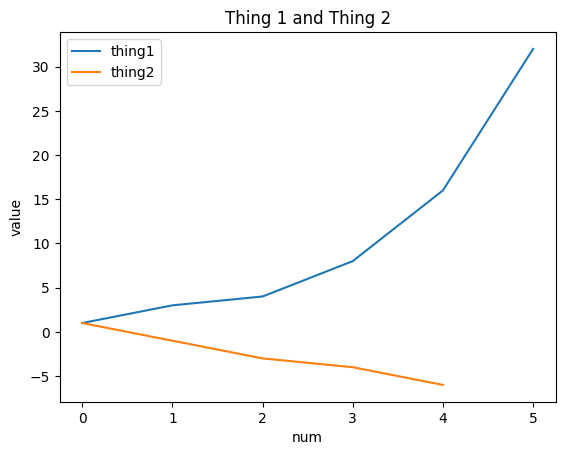

In [30]:
import matplotlib.pyplot as plt
plt.plot([1, 3, 4, 8, 16, 32], label='thing1') # plot one line
plt.plot([1, -1, -3, -4, -6], label='thing2') # plot another line
plt.legend() # show the labls and associated color
plt.xlabel('num')
plt.ylabel('value')
plt.title("Thing 1 and Thing 2")
plt.show()

<BarContainer object of 3 artists>

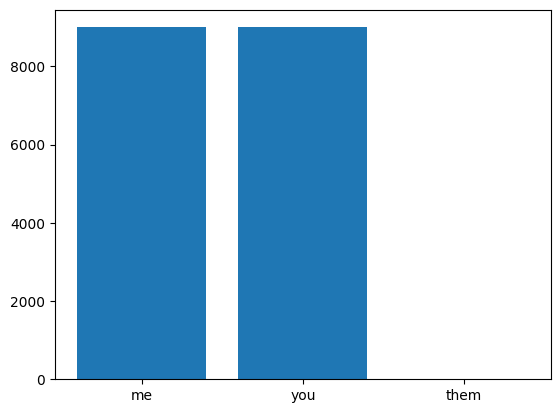

In [21]:
plt.bar(a_table['person'], a_table['power level'])

(array([0.00034655, 0.00201001, 0.00540622, 0.01400073, 0.01739694,
        0.01718901, 0.00942623, 0.00270311, 0.00062379, 0.00020793]),
 array([ 32.52945715,  46.9572813 ,  61.38510544,  75.81292958,
         90.24075373, 104.66857787, 119.09640201, 133.52422616,
        147.9520503 , 162.37987444, 176.80769859]),
 <BarContainer object of 10 artists>)

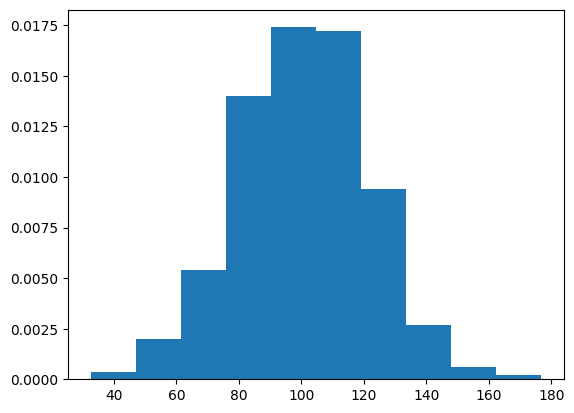

In [28]:
import numpy as np
samples = np.random.normal(100, 20, size=1000) # mean and standard deviation, 1000 samples
plt.hist(samples, density=True)  # a histogram


# the challenge:

Alongside this notebook I've sent a csv file. First, use the pandas.read_csv function to load the table.
Can you figure out what the relatonships between age, sex and height are in this dataset? 
How are these values distributed? 

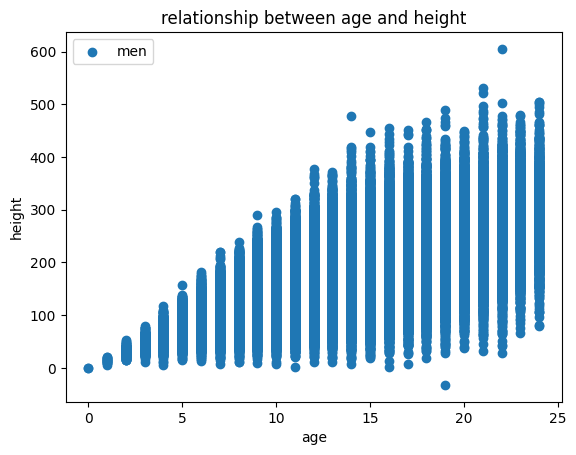

sex  age (years)  height (cm)
0         male           13   139.629531
1         male           14   211.515427
2         male           18   162.593217
3         male           15   194.224002
4         male           19   238.615988
...        ...          ...          ...
158679  female            9   158.860493
158680  female           14   295.785505
158681  female            8   174.363708
158682  female            9   107.936546
158683  female           15   332.775432

[158684 rows x 3 columns]

In [30]:
import pandas as pd
data = pd.read_csv("data.csv")



import matplotlib.pyplot as plt
plt.scatter(data['age (years)'], data['height (cm)'], label='men') # plot one line
#plt.plot(['age (years)', 'height (cm)'], label='women') # plot another line
plt.legend() # show the labls and associated color
plt.xlabel('age')
plt.ylabel('height')
plt.title("relationship between age and height")
plt.show()
data

In [31]:
data

sex  age (years)  height (cm)
0         male           13   139.629531
1         male           14   211.515427
2         male           18   162.593217
3         male           15   194.224002
4         male           19   238.615988
...        ...          ...          ...
158679  female            9   158.860493
158680  female           14   295.785505
158681  female            8   174.363708
158682  female            9   107.936546
158683  female           15   332.775432

[158684 rows x 3 columns]

In [32]:
data['sex']

0           male
1           male
2           male
3           male
4           male
           ...  
158679    female
158680    female
158681    female
158682    female
158683    female
Name: sex, Length: 158684, dtype: object

In [34]:
data[["age (years)", "height (cm)"]]

age (years)  height (cm)
0                13   139.629531
1                14   211.515427
2                18   162.593217
3                15   194.224002
4                19   238.615988
...             ...          ...
158679            9   158.860493
158680           14   295.785505
158681            8   174.363708
158682            9   107.936546
158683           15   332.775432

[158684 rows x 2 columns]

(array([2.6900e+02, 1.5441e+04, 5.5200e+04, 5.3511e+04, 2.5339e+04,
        7.2900e+03, 1.4270e+03, 1.9000e+02, 1.6000e+01, 1.0000e+00]),
 array([-32.19741286,  31.51896959,  95.23535205, 158.9517345 ,
        222.66811696, 286.38449941, 350.10088187, 413.81726433,
        477.53364678, 541.25002924, 604.96641169]),
 <BarContainer object of 10 artists>)

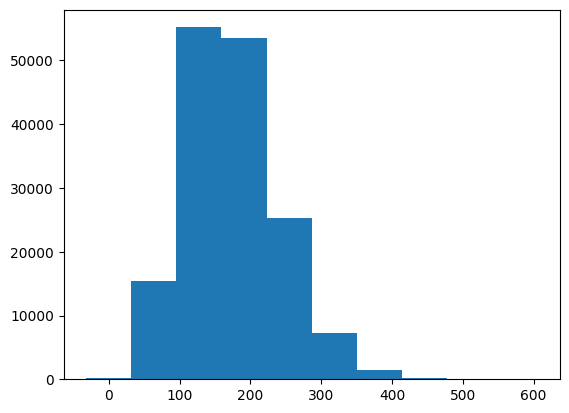

In [36]:
plt.hist(data["height (cm)"])

In [52]:
is_male = data["sex"] == 'male'
height_male = data['height (cm)'][is_male]

is_female = data["sex"] == "female"
height_female = data['height (cm)'][is_female]
height_male

0         139.629531
1         211.515427
2         162.593217
3         194.224002
4         238.615988
             ...    
118680    243.164656
118681    189.182518
118682    118.151741
118683    149.473742
118684    294.708723
Name: height (cm), Length: 118685, dtype: float64

(array([  774.,  6431., 12446., 10604.,  6000.,  2511.,   875.,   282.,
           60.,    16.]),
 array([  0.        ,  50.19574639, 100.39149278, 150.58723916,
        200.78298555, 250.97873194, 301.17447833, 351.37022472,
        401.56597111, 451.76171749, 501.95746388]),
 <BarContainer object of 10 artists>)

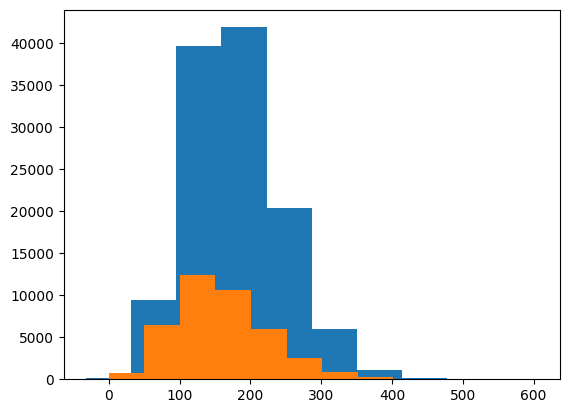

In [57]:
plt.hist(height_male)
plt.hist(height_female)


KeyError: "None of [Index([1, 2, 3, 4], dtype='int32')] are in the [columns]"